In [1]:
### PCA Plot for whole dataset ####
library(DT)
library(gt)
library(plotly)
library(tidyverse)


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks plotly::filter(), stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Group for PCA plot
targets <- read_tsv("Sequencing_data/kallisto/studydesign.txt")
sampleLabels <- targets$sample
group <- factor(targets$group)
group.rh <- targets$group
group.rh <- factor(group.rh)

# Load data
total_rh_og <- read.csv("01.DESeq_results/total_rh_og_gene.csv")

colnames(total_rh_og)

total_rh <- total_rh_og %>%
  select(1, 26:34)
  
colnames(total_rh)
total_rh <- na.omit(total_rh)

# Assuming the first column is non-numeric (e.g., row names or gene names), remove it
total_rh_numeric <- total_rh[, sapply(total_rh, is.numeric)]

# Transpose the data for PCA
total_rh_numeric_t <- t(total_rh_numeric)

# Perform PCA
pca.res.rh <- prcomp(total_rh_numeric_t, scale. = FALSE, center = TRUE)
pc.var.rh <- pca.res.rh$sdev^2 # sdev^2 captures these eigenvalues from the PCA result
pc.per.rh <- round(pc.var.rh/sum(pc.var.rh)*100, 1) 
pca.res.df.rh <- as_tibble(pca.res.rh$x)

# Add sample labels and group to the PCA result data frame
pca.res.df.rh <- pca.res.df.rh %>%
  mutate(sampleLabels = sampleLabels, group = group)

Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): sample, sra_accession, group

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Gene"                      "baseMean_RHAM_30min"      
 [3] "log2FoldChange_RHAM_30min" "lfcSE_RHAM_30min"         
 [5] "stat_RHAM_30min"           "pvalue_RHAM_30min"        
 [7] "padj_RHAM_30min"           "baseMean_RHAM_90min"      
 [9] "log2FoldChange_RHAM_90min" "lfcSE_RHAM_90min"         
[11] "stat_RHAM_90min"           "pvalue_RHAM_90min"        
[13] "padj_RHAM_90min"           "baseMean_OGs_30min"       
[15] "log2FoldChange_OGs_30min"  "lfcSE_OGs_30min"          
[17] "stat_OGs_30min"            "pvalue_OGs_30min"         
[19] "padj_OGs_30min"            "baseMean_OGs_90min"       
[21] "log2FoldChange_OGs_90min"  "lfcSE_OGs_90min"          
[23] "stat_OGs_90min"            "pvalue_OGs_90min"         
[25] "padj_OGs_90min"            "RHAM1_00min_1"            
[27] "RHAM1_00min_2"             "RHAM1_00min_3"            
[29] "RHAM1_30min_1"             "RHAM1_30min_2"            
[31] "RHAM1_30min_3"             "RHAM1_90min_1"            
[33] "RHAM1_90min_2"             "RHAM1_90min_3"            
[35] "OG_00min_1"                "OG_00min_2"               
[37] "OG_00min_3"                "OG_00min_4"               
[39] "OG_30min_1"                "OG_30min_2"               
[41] "OG_30min_3"                "OG_30min_4"               
[43] "OG_90min_1"                "OG_90min_2"               
[45] "OG_90min_3"                "OG_90min_4"

[1] "Gene"          "RHAM1_00min_1" "RHAM1_00min_2" "RHAM1_00min_3"
 [5] "RHAM1_30min_1" "RHAM1_30min_2" "RHAM1_30min_3" "RHAM1_90min_1"
 [9] "RHAM1_90min_2" "RHAM1_90min_3"

pdf 
  2

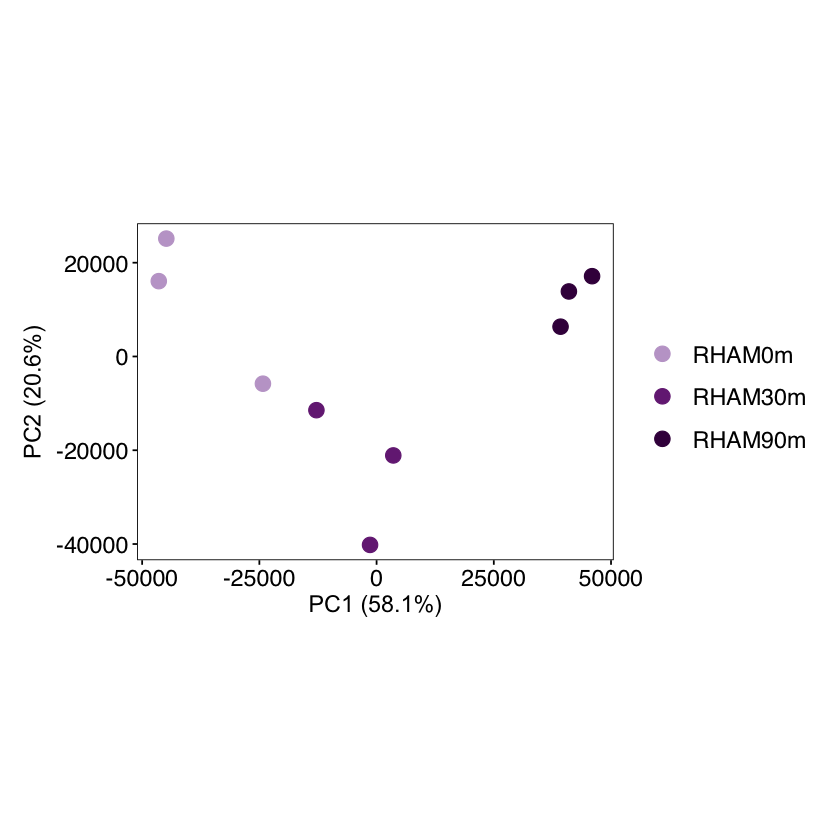

In [3]:
# draw PCA Plot for all
PCA.rh <- "03.PCA_plot/PCA_Rham1.pdf"
pdf(PCA.rh, width = 6, height = 4.5)
PCA <- ggplot(pca.res.df.rh) +
  aes(x=PC1, y=PC2, label=sampleLabels, color = group) +
  geom_point(size=4) +
  scale_color_manual(values = c('RHAM0m'='#c2a5cf','RHAM30m'='#762a83', 'RHAM90m'='#40004b')) +
  labs (x = paste0("PC1 (",pc.per.rh[1],"%",")"), y = paste0("PC2 (",pc.per.rh[2],"%",")")) +
  coord_fixed() +
  #scale_x_continuous(limits = c(-60, 60)) +
  #scale_y_continuous(limits = c(-50, 50)) + 
  theme_minimal()+
  theme(
    panel.background = element_blank(),
    panel.border = element_rect(fill = NA),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.x = element_text(colour = "black", size = 14, family = "Helvetica"),
    axis.text.y = element_text(colour = "black", size = 14, family = "Helvetica"),
    axis.ticks = element_line(colour = "black"),
    plot.margin = unit(c(1, 1, 1, 1), "line"),
    axis.title = element_text(size = 14),
    legend.position = "right",
    legend.title = element_text(size = 0),
    legend.key.size = unit(0.9, "cm"),
    legend.text = element_text(size = 14, family = "Helvetica")
  )
PCA
dev.off()
PCA


In [4]:
### select absFC >1, Padj < 0.05
DEG_rh_early_FC1_P0.05 <- total_rh_og %>%
  dplyr::select(Gene, log2FoldChange_RHAM_30min, padj_RHAM_30min) %>%
  dplyr::filter(abs(log2FoldChange_RHAM_30min) > 1 & padj_RHAM_30min < 0.05)
DEG_rh_late_FC1_P0.05 <- total_rh_og %>%
  dplyr::select(Gene, log2FoldChange_RHAM_90min, padj_RHAM_90min) %>%
  dplyr::filter(abs(log2FoldChange_RHAM_90min) > 1 & padj_RHAM_90min < 0.05)

Early_list_rh_FC1_P0.05 <- c(DEG_rh_early_FC1_P0.05$Gene)
length(Early_list_rh_FC1_P0.05)
Late_list_rh_FC1_P0.05 <- c(DEG_rh_late_FC1_P0.05$Gene)
length(Late_list_rh_FC1_P0.05)
Ult_list_rh_FC1_P0.05 <- unique(c(Early_list_rh_FC1_P0.05, Late_list_rh_FC1_P0.05))
length(Ult_list_rh_FC1_P0.05)

total_rh_filt <- total_rh_og %>%
  select(1, 26:34) %>%
  filter(Gene %in% Ult_list_rh_FC1_P0.05)

total_rh_filt <- na.omit(total_rh_filt)

# Assuming the first column is non-numeric (e.g., row names or gene names), remove it
total_rh_filt_numeric <- total_rh_filt[, sapply(total_rh_filt, is.numeric)]
str(total_rh_filt_numeric)

# Transpose the data for PCA
total_rh_filt_numeric_t <- t(total_rh_filt_numeric)

pca.res.rh.filt <- prcomp(total_rh_filt_numeric_t, scale. = TRUE, center = TRUE)
pc.var.rh.filt <- pca.res.rh.filt$sdev^2 # sdev^2 captures these eigenvalues from the PCA result
pc.per.rh.filt <- round(pc.var.rh.filt / sum(pc.var.rh.filt) * 100, 1) 
pca.res.df.rh.filt <- as_tibble(pca.res.rh.filt$x)

# Add sample labels and group to the PCA result data frame
pca.res.df.rh.filt <- pca.res.df.rh.filt %>%
  mutate(sampleLabels = sampleLabels, group = group)


[1] 1407

[1] 1543

[1] 2323

'data.frame':	2323 obs. of  9 variables:
 $ RHAM1_00min_1: num  8.24 376.96 14.22 1759.13 236.44 ...
 $ RHAM1_00min_2: num  18.52 371.38 7.56 1702.61 161.92 ...
 $ RHAM1_00min_3: num  20.5 485.25 7.58 1570.22 211.54 ...
 $ RHAM1_30min_1: num  23.6 690.5 16.9 3191.5 461.5 ...
 $ RHAM1_30min_2: num  33.7 1048.7 34.2 3392.3 424.4 ...
 $ RHAM1_30min_3: num  18 714.3 28.2 3639 428.5 ...
 $ RHAM1_90min_1: num  53 1001.8 41.8 3668 377.3 ...
 $ RHAM1_90min_2: num  25.1 1230.6 24.7 4449.4 305.4 ...
 $ RHAM1_90min_3: num  44.8 1264.2 24.5 4842.1 302.2 ...


pdf 
  2

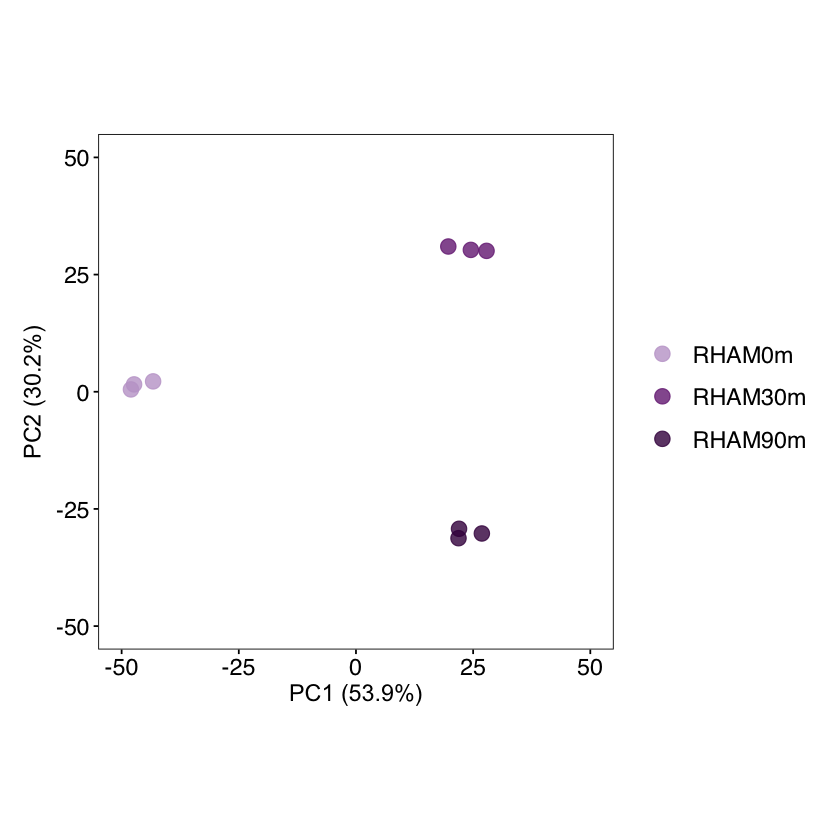

In [5]:
# Draw PCA Plot for filtered data
PCA.rh.filt <- "03.PCA_plot/PCA_Rham1_FC0.1_Padj0.05.pdf"
pdf(PCA.rh.filt, width = 6, height = 4.5)
PCA.filt <- ggplot(pca.res.df.rh.filt) +
  aes(x = PC1, y = PC2, label = sampleLabels, color = group) +
  geom_jitter(size = 4, width = 1.5, height = 1.5, alpha = 0.8) +
  scale_color_manual(values = c('RHAM0m' = '#c2a5cf', 'RHAM30m' = '#762a83', 'RHAM90m' = '#40004b')) +
  labs(x = paste0("PC1 (", pc.per.rh.filt[1], "%", ")"), y = paste0("PC2 (", pc.per.rh.filt[2], "%", ")")) +
  coord_fixed() +
  scale_x_continuous(limits = c(-50, 50)) +
  scale_y_continuous(limits = c(-50, 50)) +
  theme_minimal() +
  theme(
    panel.background = element_blank(),
    panel.border = element_rect(fill = NA),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.x = element_text(colour = "black", size = 14, family = "Helvetica"),
    axis.text.y = element_text(colour = "black", size = 14, family = "Helvetica"),
    axis.ticks = element_line(colour = "black"),
    plot.margin = unit(c(1, 1, 1, 1), "line"),
    axis.title = element_text(size = 14),
    legend.position = "right",
    legend.title = element_text(size = 0),
    legend.key.size = unit(0.9, "cm"),
    legend.text = element_text(size = 14, family = "Helvetica")
  )
PCA.filt
dev.off()
PCA.filt